# 1. What is MNIST?
 - MNIST는 손으로 쓰여진 데이터 셋이다. 0~9까지의 숫자 이미지이다.
 - 편지 우편번호 들을 자동으로 인식하고 싶어서 만들어 졌다.
 - train set : 60,000, test set : 10,000

# 2. Example of MNIST
 - 28 * 28의 사이즈이다. (28 * 28 = 784개의 값, 즉 784의 인풋)
 - 1개 채널을 가지는 gray scale 이미지이다.

# 3. torchvision
 - torchvision은 PyTorch에서 사용하는 라이브러리로써, 유명한 데이터 셋들(MNIST, COCO 등)과 아키텍쳐들 (ResNet, DenseNet 등)과 transform들(pre processing)을 이용할 수 있다.
 - torchvision.utils : 앞의 것들을 쉽게 읽어올 수 있게 해줌
 - PyTorch는 이미지를 0 ~ 1 사이의 값으로 인식하고, Channel, Height, Weight의 값을 갖는다. 일반적인 이미지는 0 ~ 255의 값을 갖고, Height, Weight, Channel 값을 갖는다. 따라서 일반적인 이미지를 PyTorch로 불러올 때 PyTorch가 읽는 순서대로 transform 하여 읽어온다. 

# 4. torchvision으로 MNIST 이용하기 실습

In [1]:
import torchvision.datasets as dsets # torchvision의 datasets를 불러와서 dsets로 이용
import torch
import torchvision.transforms as transforms


# 데이터 불러오기
mnist_train = dsets.MNIST(root = "MNIST_data/", train = True, transform = transforms.ToTensor(), download = True) # MNIST 함수를 이용함. root로 경로 지정, train으로 train set 불러올지 설정, transform으로 MNIST 일반 이미지를 PyTorch가 이미지 인식하는 방법대로 읽어오게 설정. download로 root에 MNIST 데이터가 없으면 다운을 받아오게 설정.
mnist_test = dsets.MNIST(root = "MNIST_data/", train = False, transform = transforms.ToTensor(), download=True)

# 불러온 데이터 사용하기
batch_size = 128
data_loader = torch.utils.data.DataLoader(dataset = mnist_train, batch_size = batch_size, shuffle=True, drop_last = True) # 데이터를 실제로 사용하기 위해서 DataLoader를 이용한다. DataLoader로 어떤 데이터를 로드 할 지 설정, batch_size로 총 60,000개의 데이터를 몇개 씩 잘라서 가져올 지 설정, shuffle로 데이터를 랜덤 순서로 불러올지 설정, drop_last로 batch_size로 짤라서 불러 올 때 맨 마지막에 남은 찌끄러기들을 사용 안 할지 설정

# 학습 시작
training_epochs = 15   # 임의의 값임. 
device = 'cuda' if torch.cuda.is_available() else 'cpu' # cuda가 사용 가능한 상황이면 cuda를 쓰고, 아니면 CPU를 사용

'''
for epoch in range(training_epochs):   # 학습은 아래 셀에서. 여기서는 아님
    print('epoch: ', epoch)
    for X, Y in data_loader: #X에는 MNIST 이미지, Y에는 label(0~9)이 담겨 있다.
        # 처음 X 는 Batch_size, 1채널, 28 * 28의 정보를 갖고 있다.
        X = X.view(-1, 28 * 28).to(device) # view를 이용해서 28 * 28의 사이즈를 784로 바꿔준다. X는 Batch_size, 784의 정보를 갖게 된다.
'''

"\nfor epoch in range(training_epochs):\n    print('epoch: ', epoch)\n    for X, Y in data_loader: #X에는 MNIST 이미지, Y에는 label(0~9)이 담겨 있다.\n        # 처음 X 는 Batch_size, 1채널, 28 * 28의 정보를 갖고 있다.\n        X = X.view(-1, 28 * 28).to(device) # view를 이용해서 28 * 28의 사이즈를 784로 바꿔준다. X는 Batch_size, 784의 정보를 갖게 된다.\n"

# 5. Epoch / Batch Size / Iteration
 - Epoch : Training set '전체'가 한 번 이용되면 1 epoch이 돌았다고 한다. ex) MNIST 이미지의 training set 60,000장 전체가 한 번 이용되면 1 epoch이 돌았다고 한다.
 - Batch Size : Training set을 한 번에 사용할 수 있으면 좋겠지만. 속도와 용량 문제로 잘라서 이용한다. 자르는 크기가 batch size이다.
 - Iteration : Training set '전체'가 한 번 이용되기 위해 Batch를 몇 번 돌았는가 이다.
 - ex) 1000개의 training set이 있고, batch size를 500으로 설정했으면, 2 번의 Iteration을 돌아야 1 epoch을 돌 수 있다.

# 6. MNIST를 Softmax Classifier로 실습하며 공부하기

In [2]:
linear = torch.nn.Linear(784, 10, bias = True).to(device) # Lineaer layer에 784(28*28)의 input을 입력해서 10개의 아웃풋(0~9)을 얻는다고 선언한다.

training_epochs = 15 # 전체 트레이닝 셋을 15회 학습!
batch_size = 100 # 100개씩 가져와서 이용!

criterion = torch.nn.CrossEntropyLoss().to(device) # Cost. CrossEntropy에는 Softmax가 들어있다.
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1) # Optimizer

# 학습 단계
for epoch in range(training_epochs): # 15번 Epoch을 도는 반복문
    avg_cost = 0
    total_batch = len(data_loader)

    # 한 Epoch을 도는 반복문
    for X, Y in data_loader: # data_loader로 전체 training set 중 batch_size만큼씩 가져와서 학습시킨다.
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        
        hypothesis = linear(X) # linear로 분류함.
        cost = criterion(hypothesis, Y) # cost

        # Gradient 계산 및 업데이트
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost/total_batch

    print('Epoch : %04d", "' % (epoch+1), "cost =", "{:.9f}".format(avg_cost))

Epoch : 0001", " cost = 0.573982537
Epoch : 0002", " cost = 0.373956919
Epoch : 0003", " cost = 0.342581540
Epoch : 0004", " cost = 0.325811565
Epoch : 0005", " cost = 0.315274328
Epoch : 0006", " cost = 0.307900399
Epoch : 0007", " cost = 0.301705301
Epoch : 0008", " cost = 0.297387898
Epoch : 0009", " cost = 0.293586850
Epoch : 0010", " cost = 0.290601104
Epoch : 0011", " cost = 0.287569255
Epoch : 0012", " cost = 0.285085529
Epoch : 0013", " cost = 0.282771230
Epoch : 0014", " cost = 0.280851930
Epoch : 0015", " cost = 0.279290348


# 7. MNIST 학습시킨 걸 Test set으로 평가하기

In [3]:
with torch.no_grad(): # 학습이 아닌 test이므로, Gradient를 계산 안하겠다는 뜻!
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device) #mnist_test 데이터 셋 중 X_test 불러옴
    Y_test = mnist_test.test_labels.to(device)
  
    prediction = linear(X_test) # linear 모델에 X_test를 넣어 예측값 얻음

    correct_prediction = torch.argmax(prediction, 1) == Y_test # prediction 한 값을 argmax화 하여 실제 값과 비교
    accuracy = correct_prediction.float().mean() # Accuracy!
    print("Accuracy: ", accuracy.item())

Accuracy:  0.8913999795913696


/home/cloudera/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/cloudera/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# 8. Visualization

Label:  8
Prediction:  8


/home/cloudera/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/cloudera/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


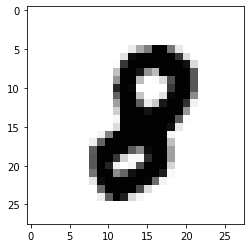

In [4]:
import matplotlib.pyplot as plt # 시각화 라이브러리
import random

r = random.randint(0, len(mnist_test) - 1) # 랜덤 값
X_single_data = mnist_test.test_data[r:r+1].view(-1, 28 * 28).float().to(device) # 테스트 셋 중 랜덤 인덱스의 내용 가져옴
Y_single_data = mnist_test.test_labels[r:r+1].to(device) # 테스트 셋 중 랜덤 인덱스의 내용 가져옴

print("Label: ", Y_single_data.item())
single_prediction = linear(X_single_data) # 랜덤 인덱스의 내용을 모델에 넣어 예측을 진행함
print("Prediction: ", torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap="Greys", interpolation="nearest") # 예측을 진행한 이미지
plt.show()